<h1 align="center" class="jp-toc-ignore" style="color: LightSeaGreen">Coder Mê Tài Chính</h1>

---
<table width="100%" style="border:0px;">
    <tr style="font-size: 14pt">
        <td><b>Evangelist:</b> Lê Minh Đạt</td>
        <td><b>Email:</b> <a href="mailto:sirminhdat@gmail.com">sirminhdat@gmail.com</a></td>
        <td><b>Zalo:</b> 0919 564 515</td>
    </tr>
</table>

<center><h1 class="jp-toc-ignore"><b>Machine Learning Cơ Bản</b></h1></center>

<center>
    <h1 style="color: Crimson; margin-top:10px; margin-bottom:0px">Cây Quyết Định - Phân Loại</h1>
    <h1 style="color: Crimson; margin-top:10px; margin-bottom:0px">(Decision Tree - Classifier)</h1>
</center>

<h3>Cây Quyết Định - Decision Tree</h3>

Cây quyết định là một thuật toán học có giám sát phi tham số (nghĩa là nó không có cái bộ tham số $w,b$ như Linear và Logistic Regression), có những đặc điểm sau:

- Có cấu trúc cây phân cấp giống như sơ đồ gồm node gốc (Root Node), nhánh (Branch Node) và node lá (Leaf Node). Các node gốc, nhánh biểu diễn các quy tắc logic; node lá biểu diễn kết quả của dữ liệu.
- Biểu thị giống sự suy nghĩ của con người nên nó đơn giản dể hiểu.
- Áp dụng cho cả vấn đề phân loại (Classification) cũng như hồi quy (Regression)

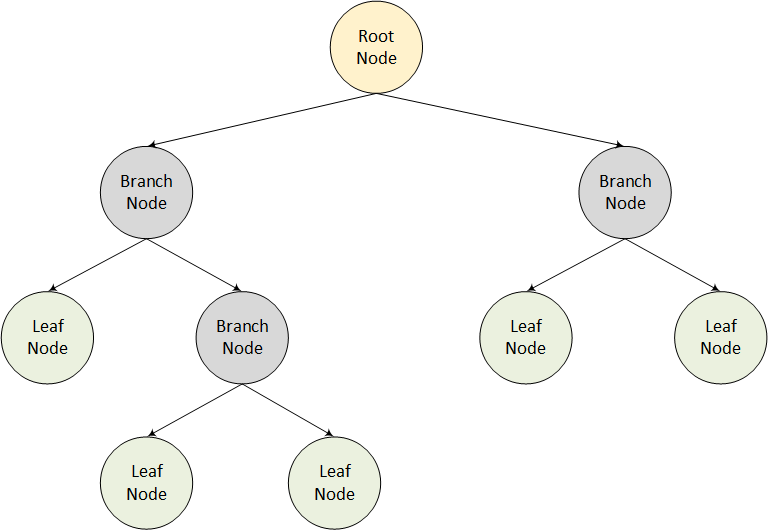

<h4>Biểu diễn dữ liệu bằng cây quyết định</h4>

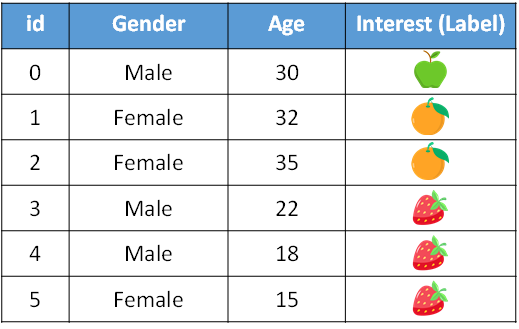

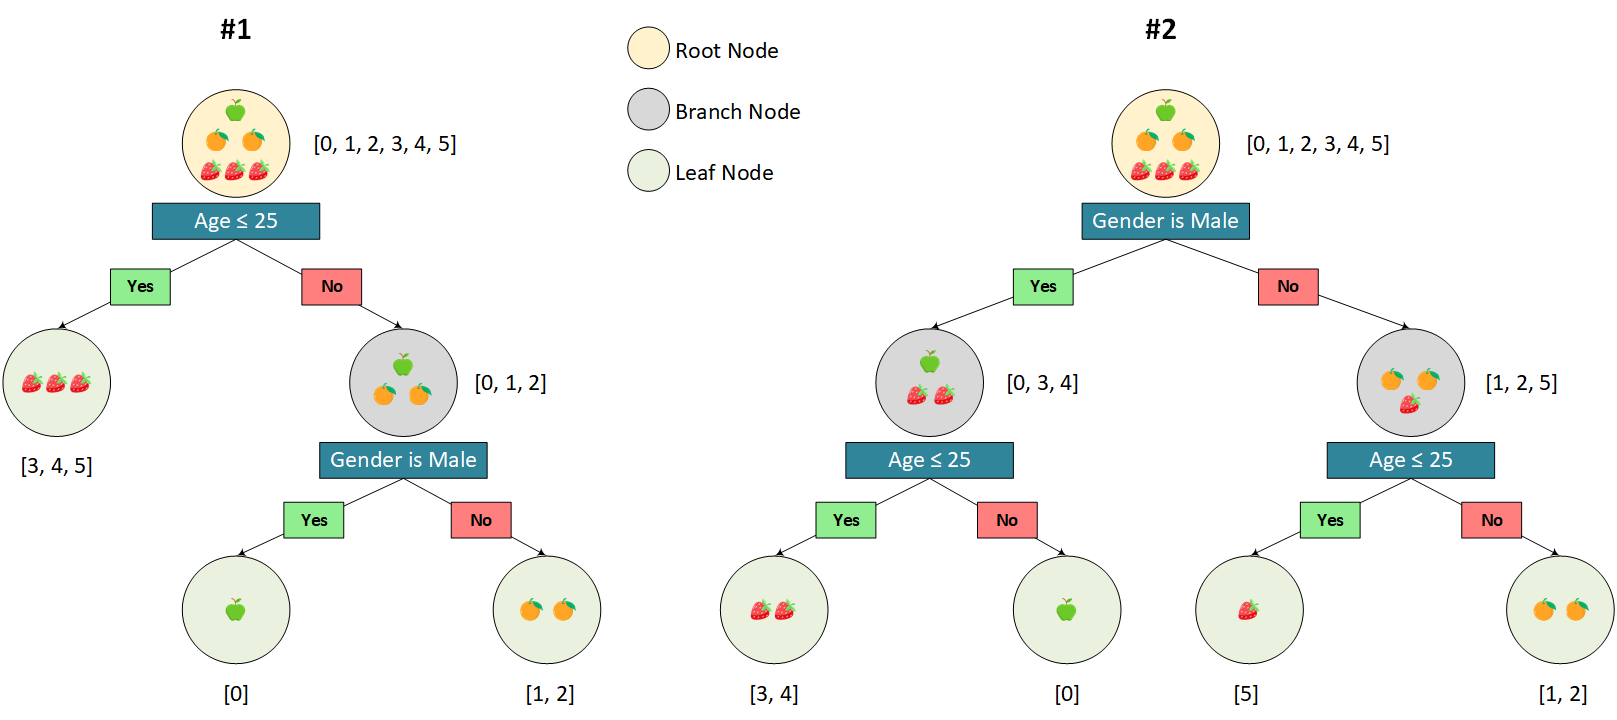

In [7]:
import numpy as np
import statistics as stat
import pprint

In [9]:
X_train = np.array([
    [1, 30],
    [0, 32],
    [0, 32],
    [1, 22],
    [1, 18],
    [0, 15]
])

y_train = np.array([0, 1, 1, 2, 2, 2]) # 0: Táo, 1: Cam, 2: Dâu

<h3>Tách dữ liệu của một feature thành 2 phần left, right</h3>

In [5]:
def split_feature(X_feature, threshold_val):
    """
    Parameters:
        X_feature (numpy.ndarray(m,)): Cột dữ liệu để split        
        threshold_val (numeric): giá trị dùng để so sánh với các phần tử trong X_feature 

    Return:
        {'left': left_idxs, 'right': right_idxs} (dict):
            left_idxs (numpy.ndarray(l,)): array lưu các index của phần tử trong X_feature có giá trị <= threshold_val
            right_idxs (numpy.ndarray(r,)): array lưu các index của phần tử trong X_feature có giá trị > threshold_val
    """
    left_idxs = np.argwhere(X_feature <= threshold_val).flatten()
    right_idxs = np.argwhere(X_feature > threshold_val).flatten()
    
    return {'left': left_idxs, 'right': right_idxs}

In [10]:
print(X_train[:,1])
split_feature(X_train[:,1], 25)

[30 32 35 22 18 15]


{'left': array([3, 4, 5], dtype=int64), 'right': array([0, 1, 2], dtype=int64)}

<h3>Độ không thuần khiết (Impurity) của dữ liệu</h3>

- Entropy
- Gini Index
- Information Gain (IG)

<h4>Entropy</h4>

$$
\Large Entropy = \sum_{i=1}^{n} p_i.log_2 \biggl(\frac{1}{p_i} \biggr) = \sum_{i=1}^{n} -p_i.log_2 (p_i)
$$

Giá trị entropy càng lớn thì độ impurity càng cao

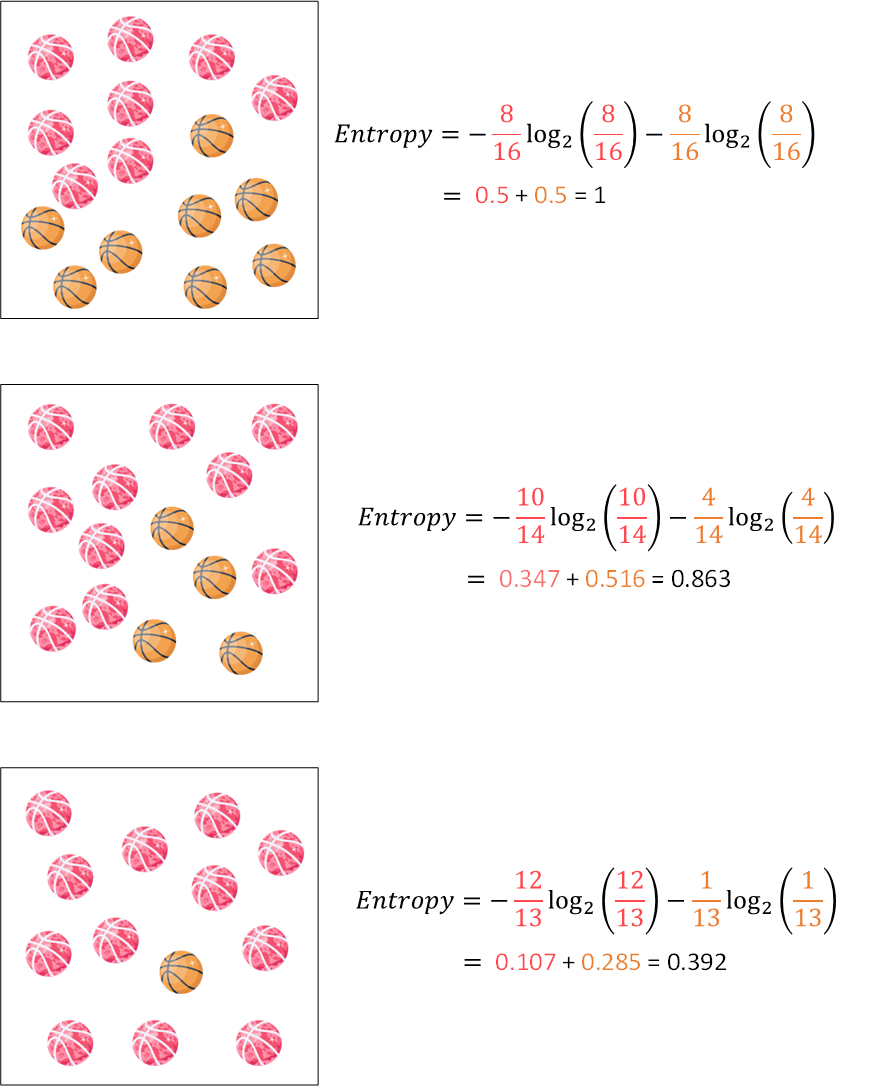

In [13]:
def compute_entropy(y):
    """
    Parameters:
        y (numpy.ndarray(m,)): array chứa các giá trị là label: 0, 1, 2,...

    Return:
        sum_entropy (numeric): Giá trị entropy của các phần tử của y
    """
    _hist = np.bincount(y)
    _proportions = _hist / len(y)
    sum_entropy = 0
    for p in _proportions:
        if p != 0 and p != 1:
            sum_entropy += p * (-np.log2(p)) #  p * np.log2(1/p)
    return sum_entropy

In [32]:
y = np.array([0, 0, 1, 1, 1, 1, 2, 2, 2])
np.bincount(y)

array([2, 4, 3], dtype=int64)

In [33]:
compute_entropy(y)

1.5304930567574826

<h4>Gini</h4>
Gini là xác suất chọn ra 2 phần tử mà 2 phần tử này là khác nhau. Giá trị Gini càng lớn thì độ impurity càng lớn

$$
\Large Gini = 1 - \sum_{i=1}^{n} p_{i}^{2}
$$

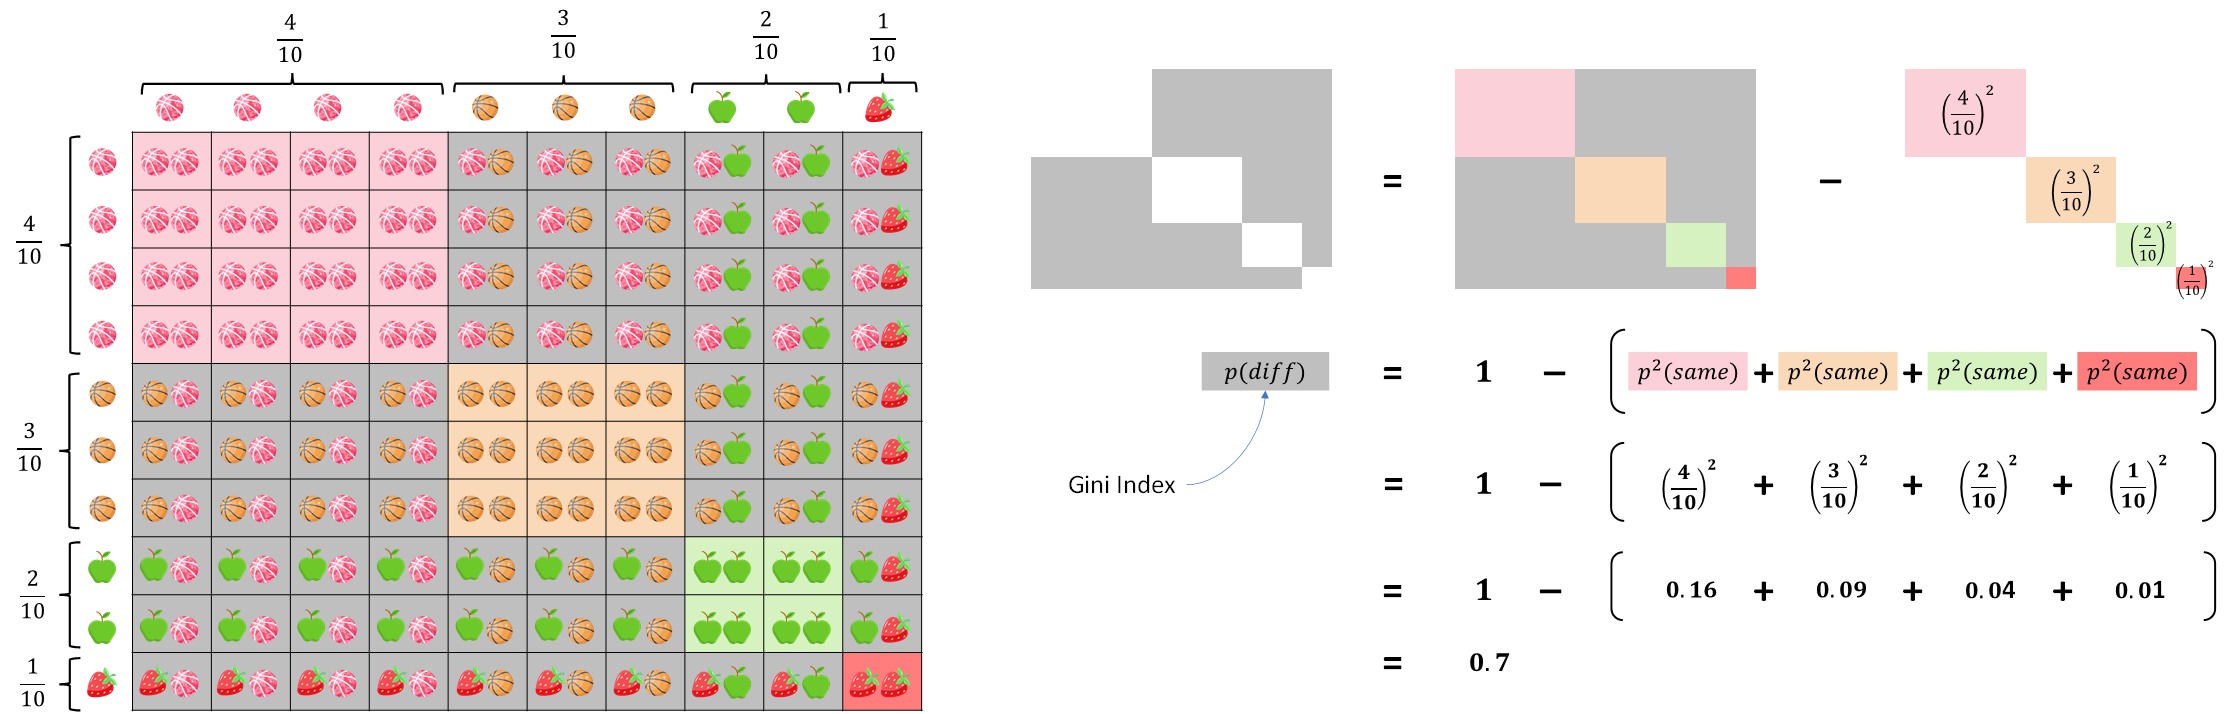

In [34]:
def compute_gini(y):
    """
    Parameters:
        y (numpy.ndarray(m,)): array chứa các giá trị là label: 0, 1, 2,...

    Return:
        gini (numeric): Giá trị Gini Index của các phần tử của y
    """
    _hist = np.bincount(y)
    _proportions = _hist / len(y)
    gini = 1 - np.sum(_proportions ** 2)
    return gini

In [35]:
compute_gini(y)

0.6419753086419753

<h4>Information Gain (IG)</h4>

$$
\begin{align}
\Large IG_{entropy} &= \Large E(parent) - \sum_{i=1}^{n} w_{i}\times E(child_{i}) \\ \\
\Large IG_{gini} &= \Large G(parent) - \sum_{i=1}^{n} w_{i}\times G(child_{i})
\end{align}
$$

In [36]:
def compute_info_gain(X_feature, y, threshold_val, criterion='entropy'):
    """
    Parameters:
        X_feature (numpy.ndarray(m,)): Cột dữ liệu để split
        y (numpy.ndarray(m,)): array chứa các giá trị là label
        threshold_val (numeric): giá trị dùng để so sánh với các phần tử trong X_feature
        criterion (string): giá trị là 'entropy' hoặc 'gini'

    Return:
        ig (numeric): Giá trị information gain
        apart_idxs (dict): gồm 2 array index đã chia: trái và phải 
    """
    apart_idxs = split_feature(X_feature, threshold_val)

    # len(apart_idxs['left']) == 0 : parent score == right score
    # len(apart_idxs['right']) == 0 : parent score == left score
    if len(apart_idxs['left']) == 0 or len(apart_idxs['right']) == 0:
        return 0, apart_idxs

    w_left = len(apart_idxs['left']) / len(y)
    w_right = len(apart_idxs['right']) / len(y)
    
    parent_impurity_score = 0
    children_impurity_score = 0    
    if criterion.lower() == 'gini': # gini
        parent_impurity_score = compute_gini(y)
        children_impurity_score = w_left * compute_gini(y[apart_idxs['left']]) + w_right * compute_gini(y[apart_idxs['right']])    
    else: # entropy
        parent_impurity_score = compute_entropy(y)
        children_impurity_score = w_left * compute_entropy(y[apart_idxs['left']]) + w_right * compute_entropy(y[apart_idxs['right']])
        
    ig = parent_impurity_score - children_impurity_score
    return ig, apart_idxs

In [37]:
compute_info_gain(X_train[:,1], y_train, 25)

(1.0,
 {'left': array([3, 4, 5], dtype=int64),
  'right': array([0, 1, 2], dtype=int64)})

In [39]:
compute_info_gain(X_train[:,1], y_train, 25, 'gini')

(0.38888888888888895,
 {'left': array([3, 4, 5], dtype=int64),
  'right': array([0, 1, 2], dtype=int64)})

<h3>Chọn cái feature nào mà khi split sao cho IG là lớn nhất</h3>

In [40]:
def get_best_split(X, y, feature_idxs, criterion='entropy'):
    """
    Parameters:
        X (numpy.ndarray(m,n)): chứa tất cả các cột feature với số lượng mẫu tương ứng ở từng node
        y (numpy.ndarray(m, )): array các label với số lượng mẫu tương ứng ở từng node        
        feature_idxs (numpy.ndarray(n, )): array chứa các index của các cột feature trong X
        criterion (string): giá trị là 'entropy' hoặc 'gini'

    Return:
        best_split (dict): lưu giá trị feature_id, threshold, ig, left_idxs, right_idxs ở bước mà có ig lớn nhất
        trace (list): Lưu các giá trị feature_id, threshold, info_gain ở từng bước lặp
    """
    max_ig = -1
    best_feature_idx = None
    best_threshold = None
    best_idxs = None
    
    trace = []
    for fi in feature_idxs:
        X_feature = X[:, fi]
        thresholds = np.unique(X_feature)
        for _threshold in thresholds:
            ig, apart_idxs = compute_info_gain(X_feature, y, _threshold, criterion)
            if ig > max_ig:
                max_ig = ig
                best_feature_idx = fi
                best_threshold = _threshold
                best_idxs = apart_idxs
                    
            trace.append({'feature_id': fi, "threshold": _threshold, "info_gain": np.round(ig, 5)})

    best_split = {
        'feature_id': best_feature_idx,
        'threshold': best_threshold,
        'ig': max_ig,
        'left_idxs': best_idxs['left'],
        'right_idxs': best_idxs['right']
    }
    
    return best_split, trace

In [46]:
X_feature_idxs = [0, 1]
best_split, trace = get_best_split(X_train, y_train, X_feature_idxs)
pprint.pprint(best_split)
pprint.pprint(trace)

{'feature_id': 1,
 'ig': 1.0,
 'left_idxs': array([3, 4, 5], dtype=int64),
 'right_idxs': array([0, 1, 2], dtype=int64),
 'threshold': 22}
[{'feature_id': 0, 'info_gain': 0.54085, 'threshold': 0},
 {'feature_id': 0, 'info_gain': 0, 'threshold': 1},
 {'feature_id': 1, 'info_gain': 0.19087, 'threshold': 15},
 {'feature_id': 1, 'info_gain': 0.45915, 'threshold': 18},
 {'feature_id': 1, 'info_gain': 1.0, 'threshold': 22},
 {'feature_id': 1, 'info_gain': 0.9183, 'threshold': 30},
 {'feature_id': 1, 'info_gain': 0.31669, 'threshold': 32},
 {'feature_id': 1, 'info_gain': 0, 'threshold': 35}]


In [47]:
X_feature_idxs = [0, 1]
best_split, trace = get_best_split(X_train, y_train, X_feature_idxs, 'gini')
pprint.pprint(best_split)
pprint.pprint(trace)

{'feature_id': 1,
 'ig': 0.38888888888888895,
 'left_idxs': array([3, 4, 5], dtype=int64),
 'right_idxs': array([0, 1, 2], dtype=int64),
 'threshold': 22}
[{'feature_id': 0, 'info_gain': 0.16667, 'threshold': 0},
 {'feature_id': 0, 'info_gain': 0, 'threshold': 1},
 {'feature_id': 1, 'info_gain': 0.07778, 'threshold': 15},
 {'feature_id': 1, 'info_gain': 0.19444, 'threshold': 18},
 {'feature_id': 1, 'info_gain': 0.38889, 'threshold': 22},
 {'feature_id': 1, 'info_gain': 0.36111, 'threshold': 30},
 {'feature_id': 1, 'info_gain': 0.14444, 'threshold': 32},
 {'feature_id': 1, 'info_gain': 0, 'threshold': 35}]


<h3>Build Decision Tree - Classifier</h3>

In [49]:
def build_dtree_classifier(X, y, node_idxs, branch_name="Root", 
                           max_features=None, max_depth=None, min_samples_split=2, criterion='entropy', cur_depth=0):
    """
    Parameters:
        X (numpy.ndarray(m,n)): ma trận các features tương ứng ở từng node
        y (numpy.ndarray(m,)): array chứa các label tương ứng ở từng node
        feature_categoricals (list(bool)): Xác định từng feature của X có là dữ liệu dạng phân loại hay không
        node_idxs (numpy.ndarray(m,)): array chứa index của y tương ứng ở từng node
        branch_name (string): Tên của node: Root, Left, Right
        max_features (int): Số lượng feature để chia lớn nhất
        max_depth (int): Độ sâu (độ cao) lớn nhất
        min_samples_split (int): Số lượng sample nhỏ nhất sau khi được chia
        criterion (string): giá trị là 'entropy' hoặc 'gini'
        cur_depth (int): Độ sâu (độ cao) hiện tại của cây
    Return:
    """
    m_samples, n_features = X.shape
    num_type_labels = len(np.unique(y)) # số lượng loại labels

    # Điều kiện dừng, không phân nhánh nữa
    if cur_depth == max_depth or m_samples == min_samples_split or num_type_labels == 1:
        _prefix = "---"*cur_depth
        print(f"{_prefix}[Depth {cur_depth} {branch_name}] leaf node with index: {node_idxs} | value: {y} | Samples split: {m_samples} | Number type of labels: {num_type_labels}")
        return
    
    if max_features is None:
        max_features = n_features
    else:
        max_features = min(max_features, n_features)

    feature_idxs = np.random.choice(n_features, max_features, replace=False)
    
    best_split, trace = get_best_split(X, y, feature_idxs, criterion)
    _prefix = "---"*cur_depth
    print(f"{_prefix}[Depth {cur_depth} {branch_name}] splits on feature: {best_split['feature_id']}")
    
    left_idxs = best_split['left_idxs']
    right_idxs = best_split['right_idxs']
    
    _indent = " "*cur_depth + "   "
    print(f"{_indent}Feature_{best_split['feature_id']}: \t\t{X[:, best_split['feature_id']]}")
    print(f"{_indent}Labels: \t\t{y}")
    print(f"{_indent}Labels index: \t{node_idxs}")
    print(f"{_indent}Samples split: \t{m_samples}")
    print(f"{_indent}Number type of labels: \t{num_type_labels}")
    print(f"{_indent}Best split:")
    print(f"{_indent}{_indent}*Trace:")
    pprint.pprint(trace, indent=10, sort_dicts=False)
    print(f"{_indent}{_indent}*Threshold value: {best_split['threshold']}")
    print(f"{_indent}{_indent}*Info gain value ({criterion}): {np.round(best_split['ig'], 5)}")
    
    print(f"{_indent}{_indent}*Left labels value: { y[left_idxs]} | Right labels value: {y[right_idxs]}")
    print(f"{_indent}{_indent}*Left labels index: {node_idxs[left_idxs]} | Right labels Index: {node_idxs[right_idxs]}")
    
    if best_split['ig'] > 0:
        # Tiếp tục build xuống nhánh bên trái
        build_dtree_classifier(X[left_idxs, :], y[left_idxs], node_idxs[left_idxs], 'Left',
                               max_features, max_depth, min_samples_split, criterion, cur_depth + 1)
        # Tiếp tục build xuống nhánh bên phải
        build_dtree_classifier(X[right_idxs, :], y[right_idxs], node_idxs[right_idxs], 'Right',
                               max_features, max_depth, min_samples_split, criterion, cur_depth + 1)
        
    return

In [50]:
np.random.seed(2024)
root_idxs = np.arange(y_train.shape[0])
build_dtree_classifier(X_train, y_train, root_idxs, criterion='entropy')

[Depth 0 Root] splits on feature: 1
   Feature_1: 		[30 32 35 22 18 15]
   Labels: 		[0 1 1 2 2 2]
   Labels index: 	[0 1 2 3 4 5]
   Samples split: 	6
   Number type of labels: 	3
   Best split:
      *Trace:
[         {'feature_id': 1, 'threshold': 15, 'info_gain': 0.19087},
          {'feature_id': 1, 'threshold': 18, 'info_gain': 0.45915},
          {'feature_id': 1, 'threshold': 22, 'info_gain': 1.0},
          {'feature_id': 1, 'threshold': 30, 'info_gain': 0.9183},
          {'feature_id': 1, 'threshold': 32, 'info_gain': 0.31669},
          {'feature_id': 1, 'threshold': 35, 'info_gain': 0},
          {'feature_id': 0, 'threshold': 0, 'info_gain': 0.54085},
          {'feature_id': 0, 'threshold': 1, 'info_gain': 0}]
      *Threshold value: 22
      *Info gain value (entropy): 1.0
      *Left labels value: [2 2 2] | Right labels value: [0 1 1]
      *Left labels index: [3 4 5] | Right labels Index: [0 1 2]
---[Depth 1 Left] leaf node with index: [3 4 5] | value: [2 2 2] | Sampl

<h4>Hình minh họa kết quả build Decision Tree - Classifier</h4>

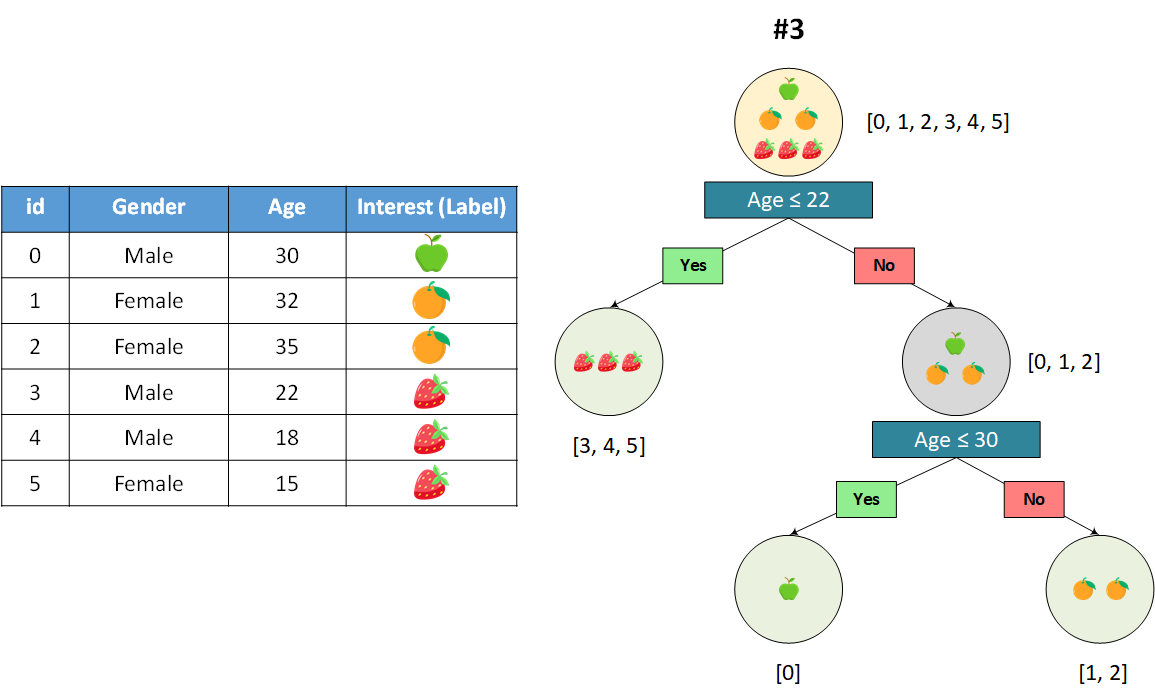

<h3>Viết code cho class DecisionTreeClassifier</h3>

In [52]:
class ViiNode:
    def __init__(self, 
                 feature=None, 
                 threshold=None, 
                 left=None, 
                 right=None, 
                 info_gain=None, 
                 depth=None,
                 branch_name=None,
                 leaf_node=False,
                 y_labels=None,
                 value=None):
        self._feature = feature
        self._threshold = threshold
        self._left = left
        self._right = right
        self._info_gain = info_gain
        self._depth = depth
        self._branch_name = branch_name
        self._leaf_node = leaf_node
        self._y_labels = y_labels
        self._value = value

    def is_leaf(self):
        return self._leaf_node

In [54]:
class ViiDecisionTreeClassifier:
    
    def __init__(self, max_features=None, max_depth=None, min_samples_split=2, criterion='entropy', random_state=0):
        self._max_features = max_features
        self._max_depth = max_depth
        self._min_samples_split = min_samples_split
        self._criterion = criterion.lower()
        self._random_state = random_state
        self._tree = None        

    def fit(self, X, y):
        if self._max_features is None:
            self._max_features = X.shape[1]
        else:
            self._max_features = min(self._max_features, X.shape[1])

        np.random.seed(self._random_state)
        self._tree = self._build_dtree_classifier(X, y)

    def predict(self, X):
        preds = []
        for xi in X:
            preds.append(self._traverse_dtree_classifier(xi, self._tree))
        return np.array(preds)
    
    def print_tree(self, feature_names=None, node=None):
        if node is None:
            node = self._tree

        if node.is_leaf() == True:
            indent = "---"*node._depth
            print(f"{indent}[Depth {node._depth} {node._branch_name}] leaf node: labels: {node._y_labels} | value: {node._value}")
            return

        _feature_name = ''
        if feature_names != None:
            _feature_name = f"('{feature_names[node._feature]}')"
        
        indent = "---"*node._depth
        print(f"{indent}[Depth {node._depth} {node._branch_name}] feature_{node._feature}{_feature_name} <= {node._threshold} | gain: {np.round(node._info_gain, 5)}")
        self.print_tree(feature_names, node._left)
        self.print_tree(feature_names, node._right)
        return


    def accuracy(self, preds, y_test):
        total_correct = np.sum(y_test == preds)
        accuracy = total_correct / len(y_test)
        return accuracy
        
    #======================================================
    def _split_feature(self, X_feature, threshold_val):
        """
        Parameters:
            X_feature (numpy.ndarray(m,)): Cột dữ liệu để split
            threshold_val (numeric): giá trị dùng để so sánh với các phần tử trong X_feature 
    
        Return:
            left_idxs (numpy.ndarray(l,)): array lưu các index của phần tử trong X_feature có giá trị <= threshold_val
            right_idxs (numpy.ndarray(r,)): array lưu các index của phần tử trong X_feature có giá trị > threshold_val
        """
        left_idxs = np.argwhere(X_feature <= threshold_val).flatten()
        right_idxs = np.argwhere(X_feature > threshold_val).flatten()

        return {'left': left_idxs, 'right': right_idxs}

    def _get_best_split(self, X, y, feature_idxs):
        """
        Parameters:
            X (numpy.ndarray(m,n)): chứa tất cả các cột feature với số lượng mẫu tương ứng ở từng node
            y (numpy.ndarray(m, )): array các label với số lượng mẫu tương ứng ở từng node
            feature_idxs (numpy.ndarray(n, )): array chứa các index của các cột feature trong X
    
        Return:
            best_split (dict): lưu giá trị feature_id, threshold, ig, left_idxs, right_idxs ở bước mà có ig lớn nhất
        """
        max_ig = -1
        best_feature_idx = None
        best_threshold = None
        best_idxs = None
        
        for fi in feature_idxs:
            X_feature = X[:, fi]
            thresholds = np.unique(X_feature)
            for _threshold in thresholds:
                ig, apart_idxs = self._information_gain(X_feature, y, _threshold)
                if ig > max_ig:
                    max_ig = ig
                    best_feature_idx = fi
                    best_threshold = _threshold
                    best_idxs = apart_idxs
                       
        best_split = {
            'feature_id': best_feature_idx,
            'threshold': best_threshold,
            'ig': max_ig,
            'left_idxs': best_idxs['left'],
            'right_idxs': best_idxs['right']
        }        
        return best_split

    def _build_dtree_classifier(self, X, y, branch_name='Root', cur_depth=0):
        """
        Parameters:
            X (numpy.ndarray(m,n)): ma trận các features tương ứng ở từng node
            y (numpy.ndarray(m,)): array chứa các label tương ứng ở từng node
            branch_name (string): Tên của node: Root, Left, Right
            cur_depth (int): Độ sâu (độ cao) hiện tại của cây
        Return:
            node (ViiNode)
        """
        m_samples, n_features = X.shape
        num_type_labels = len(np.unique(y)) # Số lượng loại labels
       
        if cur_depth == self._max_depth or m_samples == self._min_samples_split or num_type_labels == 1:
            leaf_val = self._get_leaf_value(y)
            return ViiNode(
                branch_name=branch_name,
                depth=cur_depth,
                leaf_node=True,
                y_labels=y,
                value=leaf_val)
        
        
        feature_idxs = np.random.choice(n_features, self._max_features, replace=False)
        best_split = self._get_best_split(X, y, feature_idxs)        
        
        left_idxs = best_split['left_idxs']
        right_idxs = best_split['right_idxs']

        left_node = right_node = None
        if best_split['ig'] > 0:
            left_node = self._build_dtree_classifier(X[left_idxs, :], y[left_idxs], "Left", cur_depth + 1)
            right_node = self._build_dtree_classifier(X[right_idxs, :], y[right_idxs], "Right", cur_depth + 1)

        return ViiNode(
            feature=best_split['feature_id'],
            threshold=best_split['threshold'],
            info_gain=best_split['ig'],
            left=left_node,
            right=right_node,
            branch_name=branch_name,
            depth=cur_depth)

    def _traverse_dtree_classifier(self, x, node):
        """
        Parameters:
            x (numpy.ndarray(n,)): dòng dữ liệu thứ i trong tập X_test
            node (ViiNode): node hiện tại cần phải so sánh
        """
        if node.is_leaf() == True:
            return node._value
    
        if x[node._feature] <= node._threshold:
             return self._traverse_dtree_classifier(x, node._left)
        return self._traverse_dtree_classifier(x, node._right)
    
    def _entropy(self, y):
        """
        Parameters:
            y (numpy.ndarray(m,)): array chứa các giá trị là label: 0, 1, 2,...
    
        Return:
            entropy (numeric): Giá trị entropy của các phần tử của y
        """
        hist = np.bincount(y)
        proportions = hist / len(y)
        return np.sum([p * (-np.log2(p)) for p in proportions if p != 0 and p != 1])

    def _gini(self, y):   
        """
        Parameters:
            y (numpy.ndarray(m,)): array chứa các giá trị là label: 0, 1, 2,...
    
        Return:
            gini (numeric): Giá trị Gini Index của các phần tử của y
        """
        hist = np.bincount(y)
        proportions = hist / len(y)
        return 1 - np.sum(proportions ** 2)

    
    def _information_gain(self, X_feature, y, threshold_val):
        """
        Parameters:
            X_feature (numpy.ndarray(m,)): Cột dữ liệu để split
            y (numpy.ndarray(m,)): array chứa các giá trị là label
            threshold_val (numeric): giá trị dùng để so sánh với các phần tử trong X_feature
            criterion (string): giá trị là 'entropy' hoặc 'gini'
    
        Return:
            ig (numeric): Giá trị information gain
            apart_idxs (dict): gồm 2 array index đã chia: trái và phải 
        """
        apart_idxs = self._split_feature(X_feature, threshold_val)
    
        # len(apart_idxs['left']) == 0 : parent score == right score
        # len(apart_idxs['right']) == 0 : parent score == left score
        if len(apart_idxs['left']) == 0 or len(apart_idxs['right']) == 0:
            return 0, apart_idxs
    
        w_left = len(apart_idxs['left']) / len(y)
        w_right = len(apart_idxs['right']) / len(y)
        
        parent_impurity_score = 0
        children_impurity_score = 0    
        if self._criterion == 'gini': # gini
            parent_impurity_score = self._gini(y)
            children_impurity_score = w_left * self._gini(y[apart_idxs['left']]) + w_right * self._gini(y[apart_idxs['right']])    
        else: # entropy
            parent_impurity_score = self._entropy(y)
            children_impurity_score = w_left * self._entropy(y[apart_idxs['left']]) + w_right * self._entropy(y[apart_idxs['right']])
            
        ig = parent_impurity_score - children_impurity_score
        return ig, apart_idxs        
   
    def _get_leaf_value(self, y):
        return stat.mode(y) # mode(): trả về giá trị xuất hiện nhiều nhất

In [55]:
tree_classifier = ViiDecisionTreeClassifier(random_state=2024)
tree_classifier.fit(X_train, y_train)
tree_classifier.print_tree()

[Depth 0 Root] feature_1 <= 22 | gain: 1.0
---[Depth 1 Left] leaf node: labels: [2 2 2] | value: 2
---[Depth 1 Right] feature_1 <= 30 | gain: 0.9183
------[Depth 2 Left] leaf node: labels: [0] | value: 0
------[Depth 2 Right] leaf node: labels: [1 1] | value: 1


<h4>Minh họa quá trình hàm $fit()$ gọi hàm $build\_dtree\_classifier()$</h4>

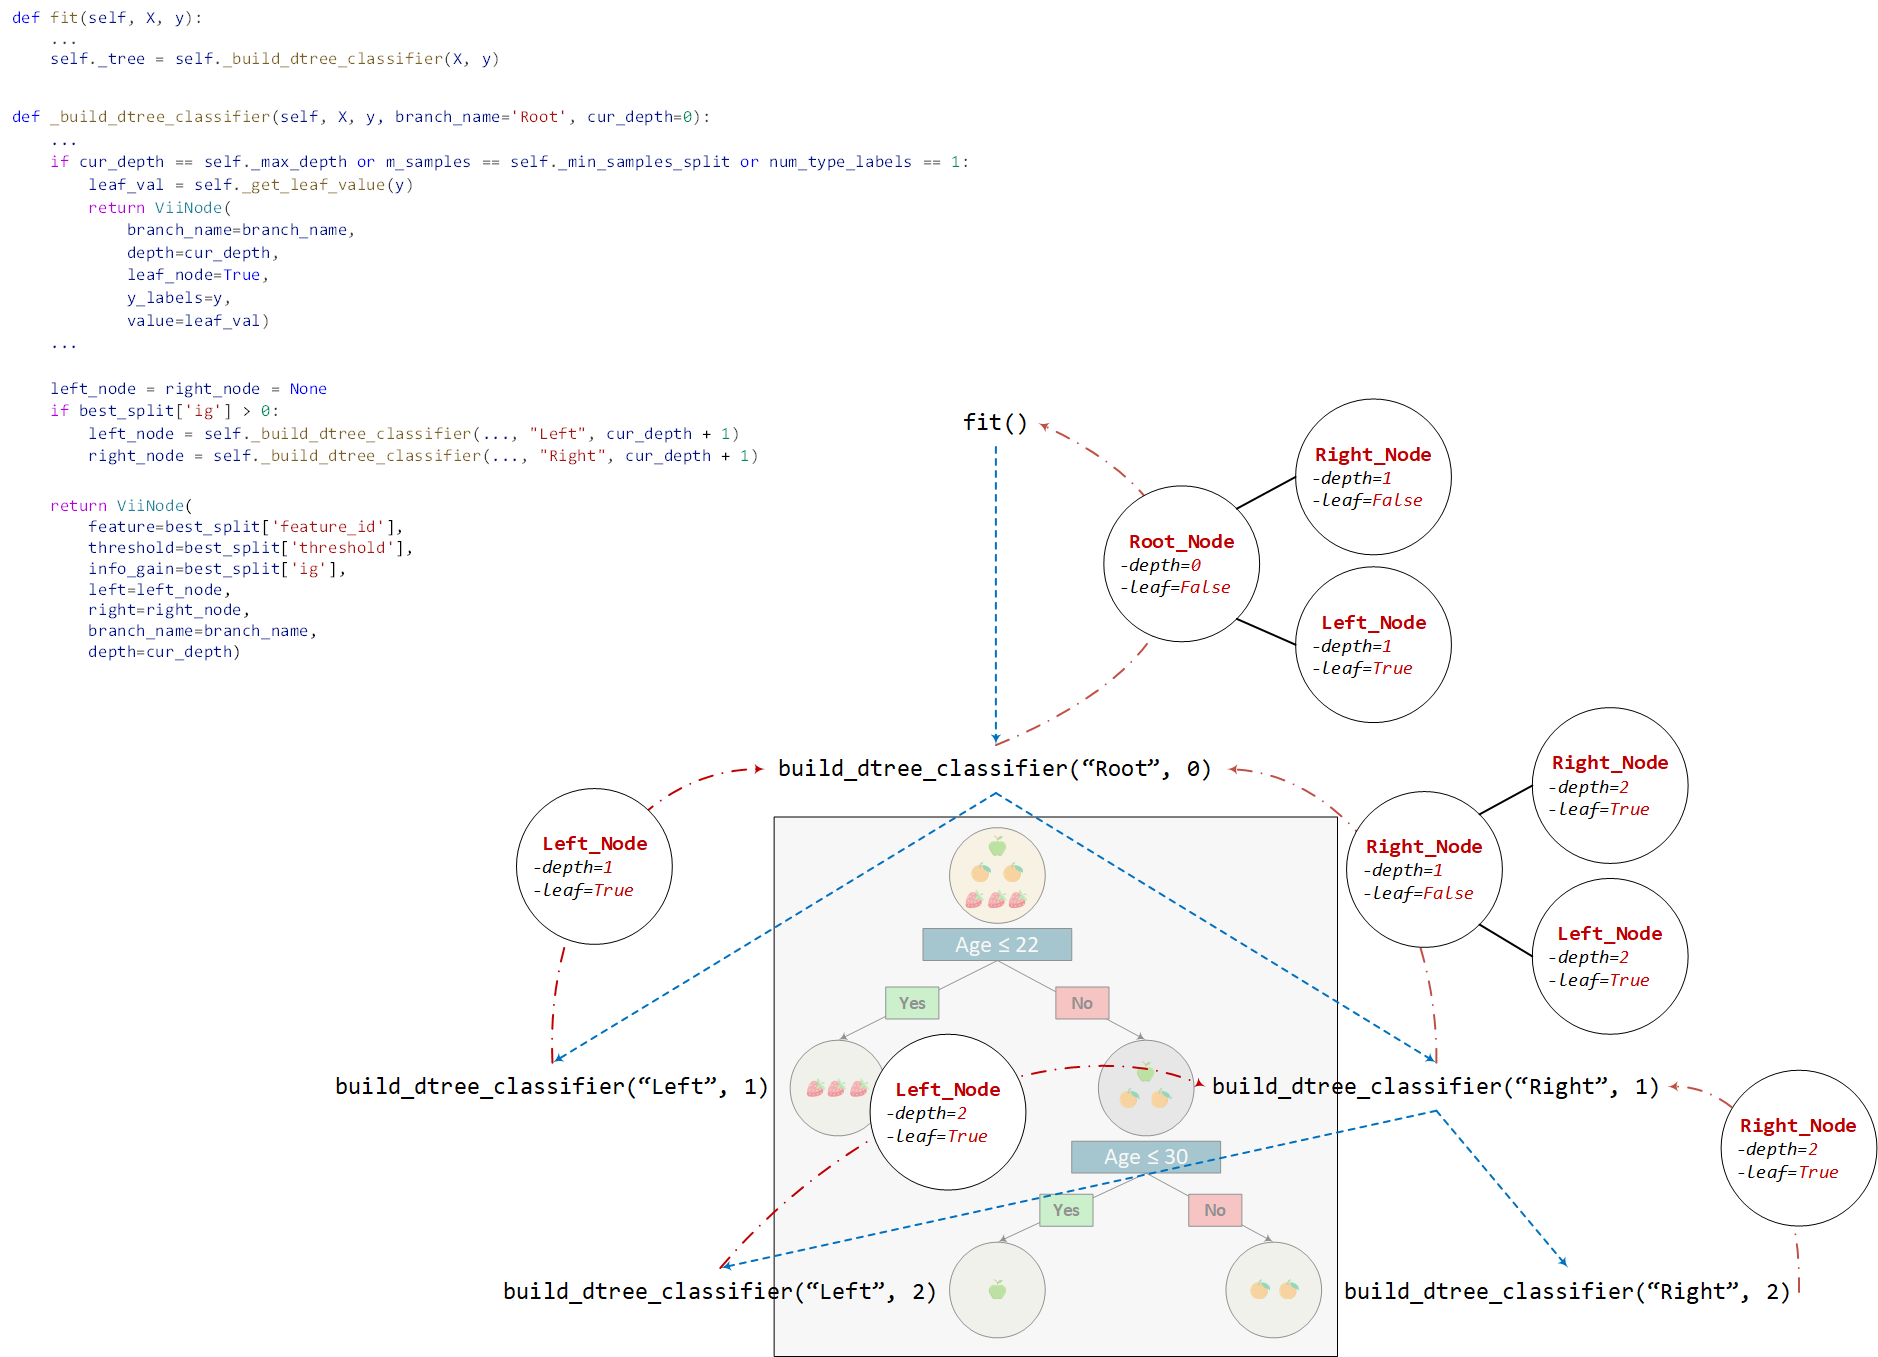

<h4>Minh họa quá trình hàm $predict()$ gọi hàm $traverse\_dtree\_classifier()$</h4>

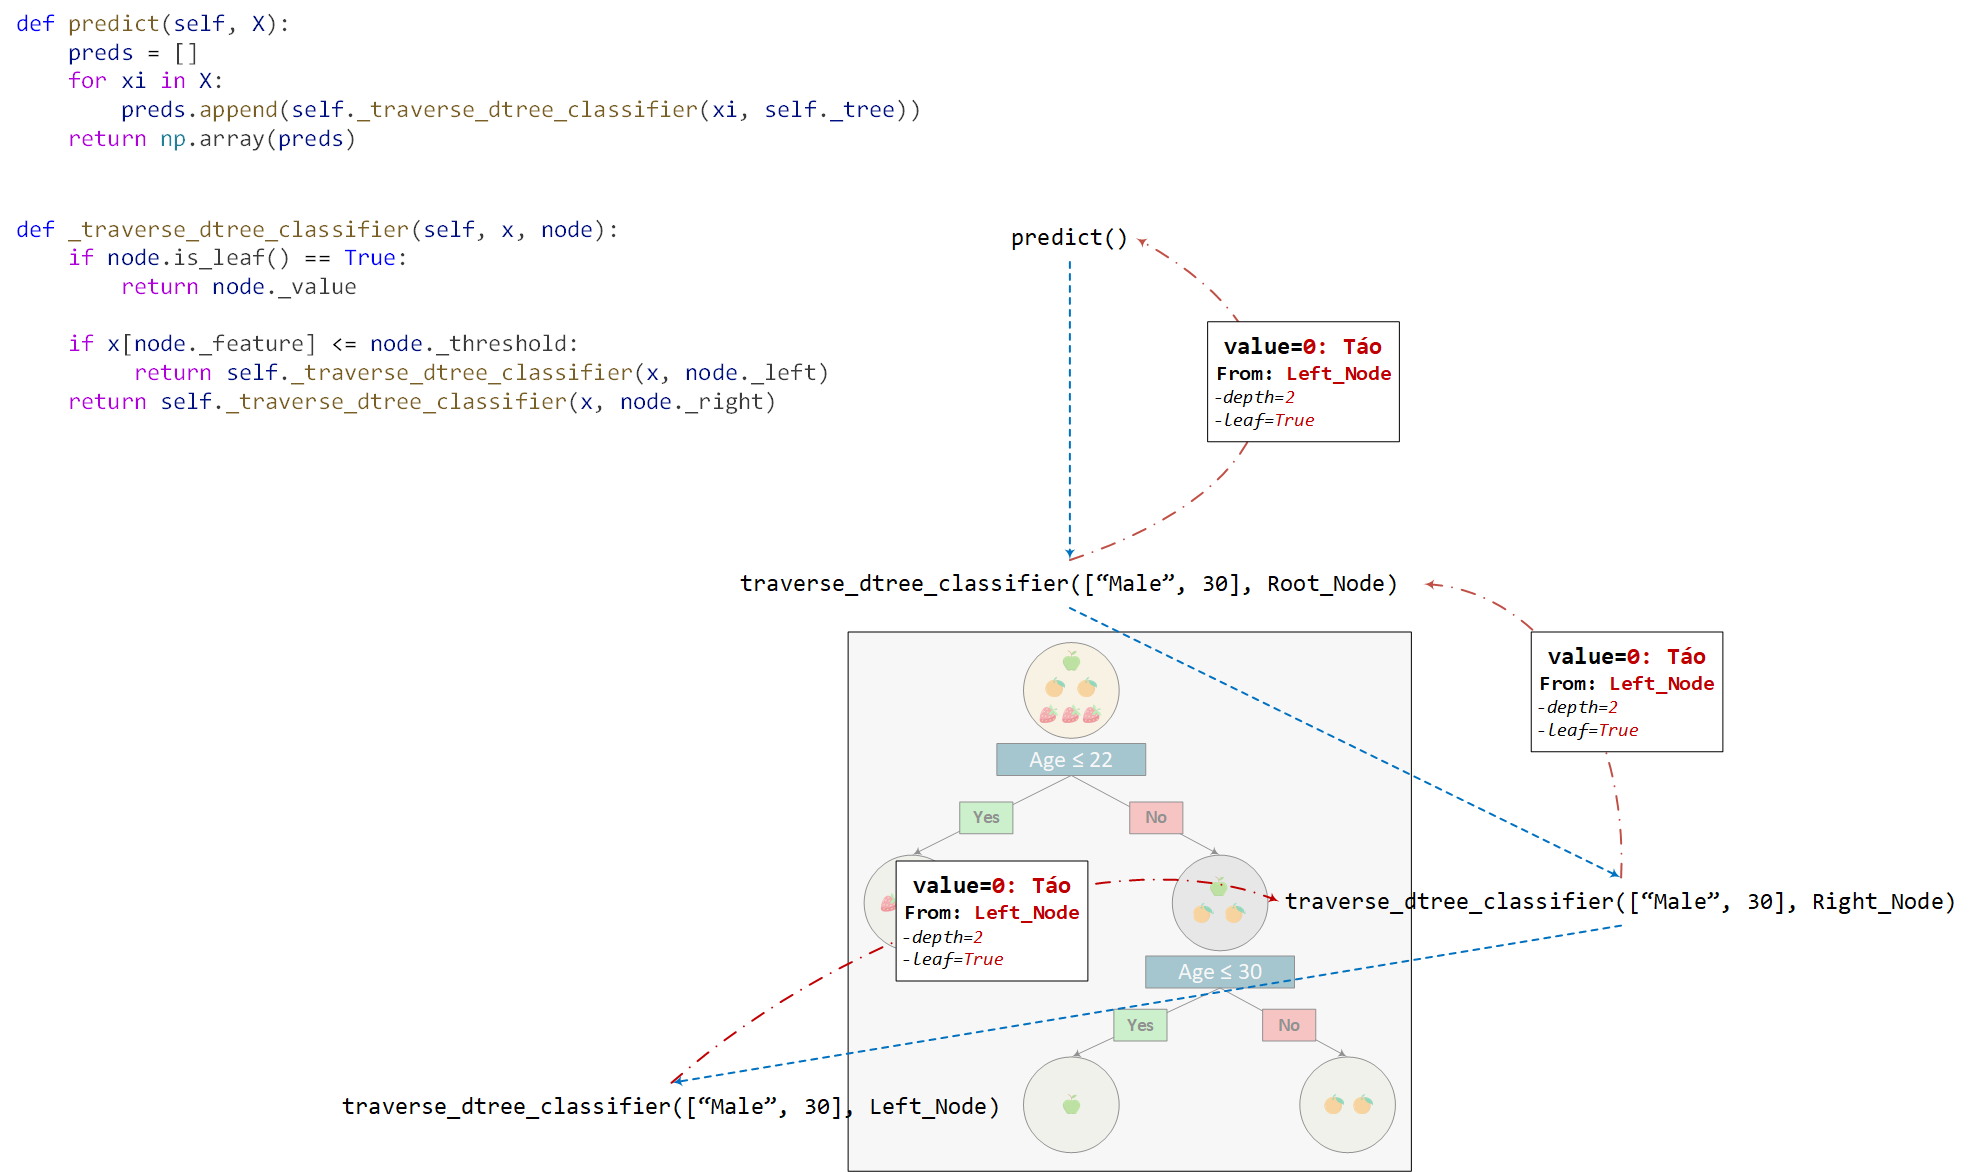

<h3>Train và Test Model</h3>

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [57]:
df = pd.read_csv("data/diabetes2.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [58]:
X_data = df.drop(columns='Outcome',axis=1)
X_feature_names = X_data.columns.tolist()
X_data = X_data.to_numpy()
y_data = df['Outcome'].to_numpy()

In [59]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_data, y_data, test_size=0.3, random_state=2024)

In [63]:
tree_classifier2 = ViiDecisionTreeClassifier(max_depth=5, random_state=2024)
tree_classifier2.fit(X_train2, y_train2)

In [64]:
tree_classifier2.print_tree(X_feature_names)

[Depth 0 Root] feature_1('Glucose') <= 143.0 | gain: 0.12993
---[Depth 1 Left] feature_5('BMI') <= 26.3 | gain: 0.08849
------[Depth 2 Left] feature_5('BMI') <= 0.0 | gain: 0.07381
---------[Depth 3 Left] feature_0('Pregnancies') <= 6.0 | gain: 0.81128
------------[Depth 4 Left] leaf node: labels: [0 0 0 0 0 0] | value: 0
------------[Depth 4 Right] leaf node: labels: [1 1] | value: 1
---------[Depth 3 Right] leaf node: labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] | value: 0
------[Depth 2 Right] feature_7('Age') <= 28.0 | gain: 0.0603
---------[Depth 3 Left] feature_1('Glucose') <= 106.0 | gain: 0.05435
------------[Depth 4 Left] feature_3('SkinThickness') <= 30.0 | gain: 0.07197
---------------[Depth 5 Left] leaf node: labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 

In [65]:
preds = tree_classifier2.predict(X_test2)
accuracy = tree_classifier2.accuracy(preds, y_test2)
print(f"y_test: {y_test2}")
print(f"Prediction: {preds}")
print(f"Accuracy: {(accuracy * 100):.2f}%")

y_test: [0 0 1 1 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 1
 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 1 1
 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1
 0 0 1 0 1 0 0 1 0]
Prediction: [0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1
 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 1 0 0 1 0
 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1
 0 0 1 0 1 0 0 1 0]
Accuracy: 73.59%
